<a href="https://colab.research.google.com/github/WajeehGillani/learning-agents/blob/main/my_fifth_lang_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip -q install langgraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.3/153.3 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.7/216.7 kB 14.8 MB/s eta 0:00:00


In [26]:
from langgraph.graph import StateGraph, END
from typing import TypedDict, List

In [22]:
class AgentState(TypedDict):
  player_name:str
  guesses: List[int]
  attempts: int
  lower_bound: int
  upper_bound: int
  target_number:int


In [173]:
import random

def setup_node(state:AgentState) -> AgentState:
  init =  AgentState(
    player_name=state['player_name'],
    guesses=[],
    target_number=random.randint(1, 20),
    attempts=0,
    lower_bound=1,
    upper_bound=20
  )
  print("INITIAL STATE",init)
  return init


def guess_node(state:AgentState):
  guess = random.randint(state['lower_bound'], state['upper_bound'])
  print(f"AI Guess {guess}")
  state['guesses'].append(guess)
  state['attempts'] += 1
  return state

def hint_node(state:AgentState):
  if state['target_number'] > state['guesses'][-1]:
    print(f"checking if {state['target_number']} is > than {state['guesses'][-1]}")
    state['lower_bound'] = state['guesses'][-1] + 1
    print("Lower")
    return state
  elif state['target_number'] < state['guesses'][-1]:
    print(f"checking if {state['target_number']} is < than {state['guesses'][-1]}")
    state['upper_bound'] = state['guesses'][-1] - 1
    print("Higher")
    return state
  else:
    print("Correct")
    return state

def should_continue(state: AgentState) -> str:
    """Determine if we should continue guessing or end the game"""

    # There are 2 end conditions - either 7 is reached or the correct number is guessed

    latest_guess = state["guesses"][-1]
    if latest_guess == state["target_number"]:
        print(f"GAME OVER: Number found!")
        return "exit"
    elif state["attempts"] >= 7:
        print(f"GAME OVER: Maximum attempts reached! The number was {state['target_number']}")
        return "exit"
    else:
        print(f"CONTINUING: {state['attempts']}/7 attempts used")
        return "continue"

In [174]:
graph = StateGraph(AgentState)

graph.add_node('setup', setup_node)
graph.add_node('guessing', guess_node)
graph.add_node('hint', hint_node)
graph.add_edge('setup','guessing')
graph.add_edge('guessing','hint')
graph.add_conditional_edges('hint', should_continue,{
    "continue":"guessing",
    "exit": END
})
graph.set_entry_point('setup')

In [175]:
app=graph.compile()

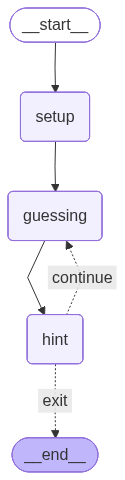

In [176]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [177]:
result = app.invoke({"player_name": "Student", "guesses": [], "attempts": 0, "lower_bound": 1, "upper_bound": 20})


INITIAL STATE {'player_name': 'Student', 'guesses': [], 'target_number': 7, 'attempts': 0, 'lower_bound': 1, 'upper_bound': 20}
AI Guess 14
checking if 7 is < than 14
Higher
CONTINUING: 1/7 attempts used
AI Guess 6
checking if 7 is > than 6
Lower
CONTINUING: 2/7 attempts used
AI Guess 13
checking if 7 is < than 13
Higher
CONTINUING: 3/7 attempts used
AI Guess 7
Correct
GAME OVER: Number found!
